In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataframe = pd.read_csv('sales.csv', usecols=[1], engine='python')

In [3]:
dataframe

,2815
0,2751
1,2755
2,2721
3,2946
4,3036
...,...
99,4618
100,5312
101,4298
102,1413


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2815    104 non-null    int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(dataframe).reshape(-1,1))

In [6]:
df1

array([[0.10701432],
       [0.10733424],
       [0.10461489],
       [0.12261057],
       [0.12980885],
       [0.06950332],
       [0.06390466],
       [0.12069103],
       [0.23098456],
       [0.34799648],
       [0.47180677],
       [0.09021835],
       [0.08493961],
       [0.12940894],
       [0.14820443],
       [0.18899464],
       [0.14532512],
       [0.129169  ],
       [0.02767336],
       [0.17451812],
       [0.24482124],
       [0.43389586],
       [0.55538671],
       [0.13596737],
       [0.12740942],
       [0.21066944],
       [0.1687595 ],
       [0.20187155],
       [0.20579061],
       [0.14772455],
       [0.01279693],
       [0.1691594 ],
       [0.3037671 ],
       [0.49596097],
       [0.62712949],
       [0.31688395],
       [0.13396785],
       [0.18435575],
       [0.24802048],
       [0.24850036],
       [0.25002   ],
       [0.17995681],
       [0.01839559],
       [0.26601616],
       [0.32112293],
       [0.55194753],
       [0.73886267],
       [0.177

In [7]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [8]:
training_size,test_size

(67, 37)

In [9]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0] 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [10]:
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [11]:
print(X_train.shape), print(y_train.shape)
print("hlhlh")

(56, 10)
(56,)


(None, None)

In [12]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [13]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [14]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 0.0975 - val_loss: 0.1437
Epoch 2/100
1/1 [==============================] - 0s 73ms/step - loss: 0.0869 - val_loss: 0.1300
Epoch 3/100
1/1 [==============================] - 0s 68ms/step - loss: 0.0769 - val_loss: 0.1167
Epoch 4/100
1/1 [==============================] - 0s 65ms/step - loss: 0.0671 - val_loss: 0.1035
Epoch 5/100
1/1 [==============================] - 0s 73ms/step - loss: 0.0576 - val_loss: 0.0907
Epoch 6/100
1/1 [==============================] - 0s 67ms/step - loss: 0.0486 - val_loss: 0.0790
Epoch 7/100
1/1 [==============================] - 0s 71ms/step - loss: 0.0405 - val_loss: 0.0698
Epoch 8/100
1/1 [==============================] - 0s 65ms/step - loss: 0.0346 - val_loss: 0.0650
Epoch 9/100
1/1 [==============================] - 0s 63ms/step - loss: 0.0323 - val_loss: 0.0665
Epoch 10/100
1/1 [==============================] - 0s 65ms/step - loss: 0.0348 - val_loss: 0.0710
Epoch 11/100
1/1 [===

In [15]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [16]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [17]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train,train_predict)))

Root Mean Squared Error: 4647.5712921912755


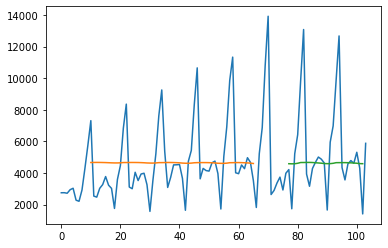

In [18]:
look_back=10
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()